 ### Logistic Regression
 

In [3]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
pd.set_option("display.max.columns", None)

In [4]:
#Load the data set
bank = pd.read_csv('bank-full (1).csv')
bank.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,95,retired,married,secondary,no,0,no,no,telephone,1,oct,215,1,-1,0,unknown,no
1,95,retired,divorced,primary,no,2282,no,no,telephone,21,apr,207,17,-1,0,unknown,yes
2,94,retired,divorced,secondary,no,1234,no,no,cellular,3,mar,212,1,-1,0,unknown,no
3,93,retired,married,unknown,no,775,no,no,cellular,4,aug,476,2,13,9,success,yes
4,93,retired,married,unknown,no,775,no,no,cellular,22,jul,860,2,177,7,success,yes


#### EDA

In [5]:
bank.describe()

,age,balance,day,duration,campaign,pdays,previous
count,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000
mean,40.936210,1362.272058,15.806419,258.163080,2.763841,40.197828,0.580323
std,10.618762,3044.765829,8.322476,257.527812,3.098021,100.128746,2.303441
min,18.000000,-8019.000000,1.000000,0.000000,1.000000,-1.000000,0.000000
25%,33.000000,72.000000,8.000000,103.000000,1.000000,-1.000000,0.000000
50%,39.000000,448.000000,16.000000,180.000000,2.000000,-1.000000,0.000000
75%,48.000000,1428.000000,21.000000,319.000000,3.000000,-1.000000,0.000000
max,95.000000,102127.000000,31.000000,4918.000000,63.000000,871.000000,275.000000


In [6]:
bank.corr()

,age,balance,day,duration,campaign,pdays,previous
age,1.000000,0.097783,-0.009120,-0.004648,0.004760,-0.023758,0.001288
balance,0.097783,1.000000,0.004503,0.021560,-0.014578,0.003435,0.016674
day,-0.009120,0.004503,1.000000,-0.030206,0.162490,-0.093044,-0.051710
duration,-0.004648,0.021560,-0.030206,1.000000,-0.084570,-0.001565,0.001203
campaign,0.004760,-0.014578,0.162490,-0.084570,1.000000,-0.088628,-0.032855
pdays,-0.023758,0.003435,-0.093044,-0.001565,-0.088628,1.000000,0.454820
previous,0.001288,0.016674,-0.051710,0.001203,-0.032855,0.454820,1.000000


In [7]:
bank.shape

(45211, 17)

45211 rows and 17 columns are present in dataset

In [8]:
bank.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45211 entries, 0 to 45210
Data columns (total 17 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   age        45211 non-null  int64 
 1   job        45211 non-null  object
 2   marital    45211 non-null  object
 3   education  45211 non-null  object
 4   default    45211 non-null  object
 5   balance    45211 non-null  int64 
 6   housing    45211 non-null  object
 7   loan       45211 non-null  object
 8   contact    45211 non-null  object
 9   day        45211 non-null  int64 
 10  month      45211 non-null  object
 11  duration   45211 non-null  int64 
 12  campaign   45211 non-null  int64 
 13  pdays      45211 non-null  int64 
 14  previous   45211 non-null  int64 
 15  poutcome   45211 non-null  object
 16  y          45211 non-null  object
dtypes: int64(7), object(10)
memory usage: 5.9+ MB


NO null value in dataset

In [9]:
#Count of duplicated rows
bank[bank.duplicated()].shape

(0, 17)

No duplicate row present in dataset

## Data Visualization

<AxesSubplot:>

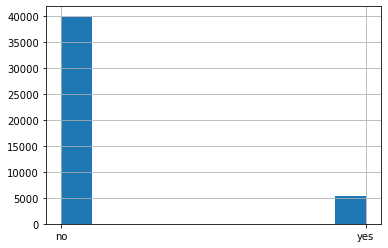

In [10]:
bank.y.hist()

- Data is highly immbalanced By the obervation of the histplot the number of not subcribe term client is higher 

In [11]:
##Check relation between features and target

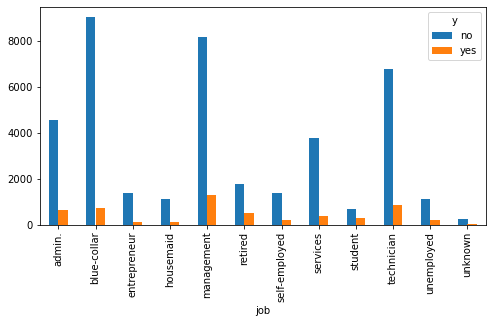

In [12]:
# bar plot between 2 different categories 
pd.crosstab(bank.job,bank.y).plot(kind="bar",figsize=(8,4));  

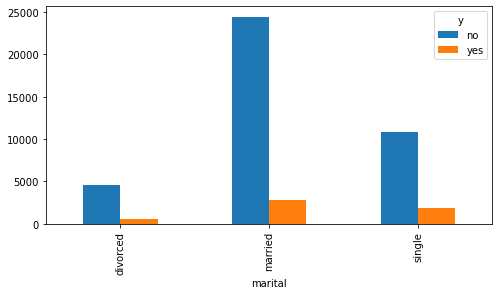

In [13]:
# bar plot between 2 different categories 
pd.crosstab(bank.marital,bank.y).plot(kind="bar",figsize=(8,4));  

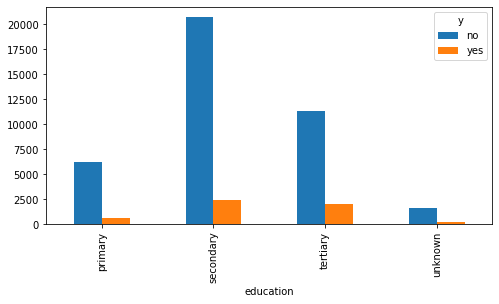

In [14]:
pd.crosstab(bank.education,bank.y).plot(kind="bar",figsize=(8,4)); 

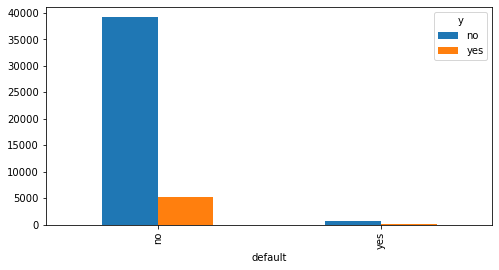

In [15]:
pd.crosstab(bank.default,bank.y).plot(kind="bar",figsize=(8,4)); 

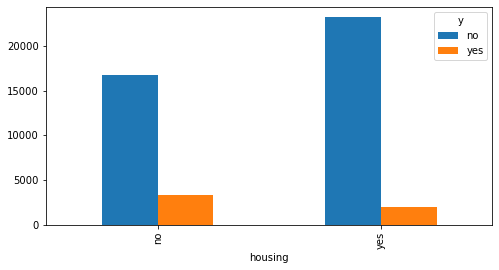

In [16]:
pd.crosstab(bank.housing,bank.y).plot(kind="bar",figsize=(8,4)); 

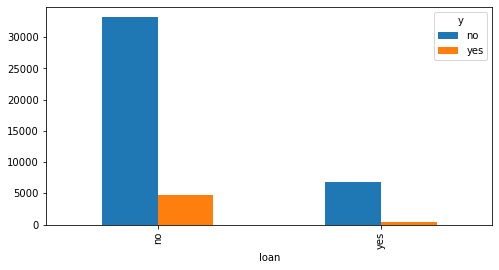

In [17]:
pd.crosstab(bank.loan,bank.y).plot(kind="bar",figsize=(8,4)); 

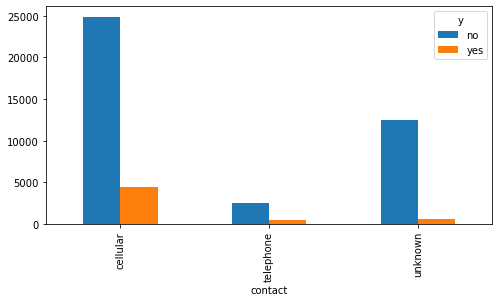

In [18]:
pd.crosstab(bank.contact,bank.y).plot(kind="bar",figsize=(8,4)); 

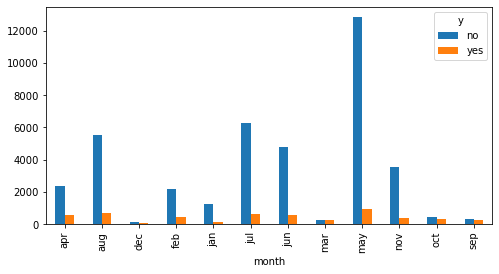

In [19]:
pd.crosstab(bank.month,bank.y).plot(kind="bar",figsize=(8,4)); 

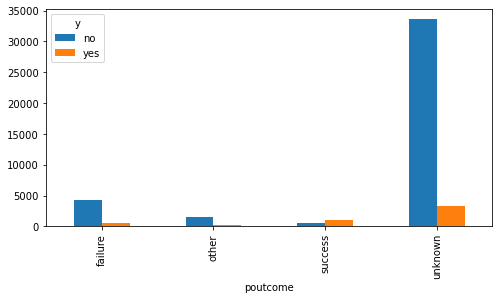

In [20]:
pd.crosstab(bank.poutcome,bank.y).plot(kind="bar",figsize=(8,4)); 

### Encoding

There are two data types:

Numerical Data: age, balance, day, duration, campaign, pdays, previous

Categorical Data:job,marital,education,default,housing,loan,contact,month,poutcome,y

from categorical data column job,marital,education,contact,poutcome,months have multiple categories hence apply one hot encoding encoding 

In [21]:
# One-Hot-Encoding of categrical variables
data1=pd.get_dummies(bank,columns=['job','marital','education','contact','poutcome','month'])
data1

,age,default,balance,housing,loan,day,duration,campaign,pdays,previous,y,job_admin.,job_blue-collar,job_entrepreneur,job_housemaid,job_management,job_retired,job_self-employed,job_services,job_student,job_technician,job_unemployed,job_unknown,marital_divorced,marital_married,marital_single,education_primary,education_secondary,education_tertiary,education_unknown,contact_cellular,contact_telephone,contact_unknown,poutcome_failure,poutcome_other,poutcome_success,poutcome_unknown,month_apr,month_aug,month_dec,month_feb,month_jan,month_jul,month_jun,month_mar,month_may,month_nov,month_oct,month_sep
0,95,no,0,no,no,1,215,1,-1,0,no,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,1,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0
1,95,no,2282,no,no,21,207,17,-1,0,yes,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,1,0,0,0,0,1,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0
2,94,no,1234,no,no,3,212,1,-1,0,no,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,1,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0
3,93,no,775,no,no,4,476,2,13,9,yes,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,1,1,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0
4,93,no,775,no,no,22,860,2,177,7,yes,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,1,1,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45206,18,no,5,no,no,24,143,2,-1,0,no,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,1,0,0,1,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0
45207,18,no,156,no,no,4,298,2,82,4,no,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,1,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0
45208,18,no,608,no,no,13,210,1,93,1,yes,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,1,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0
45209,18,no,608,no,no,12,267,1,-1,0,yes,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,1,0,0,0,1,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0


-change four categorical columns into numerical columns because they have binary values (default, housing, loan, y)

In [22]:
deposit = data1.copy()
deposit['default'] = deposit['default'].map({'yes': 1, 'no': 0})
deposit['housing'] = deposit['housing'].map({'yes': 1, 'no': 0})
deposit['loan'] = deposit['loan'].map({'yes': 1, 'no': 0})
deposit['y'] = deposit['y'].map({'yes': 1, 'no': 0})
deposit

,age,default,balance,housing,loan,day,duration,campaign,pdays,previous,y,job_admin.,job_blue-collar,job_entrepreneur,job_housemaid,job_management,job_retired,job_self-employed,job_services,job_student,job_technician,job_unemployed,job_unknown,marital_divorced,marital_married,marital_single,education_primary,education_secondary,education_tertiary,education_unknown,contact_cellular,contact_telephone,contact_unknown,poutcome_failure,poutcome_other,poutcome_success,poutcome_unknown,month_apr,month_aug,month_dec,month_feb,month_jan,month_jul,month_jun,month_mar,month_may,month_nov,month_oct,month_sep
0,95,0,0,0,0,1,215,1,-1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,1,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0
1,95,0,2282,0,0,21,207,17,-1,0,1,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,1,0,0,0,0,1,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0
2,94,0,1234,0,0,3,212,1,-1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,1,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0
3,93,0,775,0,0,4,476,2,13,9,1,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,1,1,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0
4,93,0,775,0,0,22,860,2,177,7,1,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,1,1,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45206,18,0,5,0,0,24,143,2,-1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,1,0,0,1,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0
45207,18,0,156,0,0,4,298,2,82,4,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,1,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0
45208,18,0,608,0,0,13,210,1,93,1,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,1,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0
45209,18,0,608,0,0,12,267,1,-1,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,1,0,0,0,1,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0


In [23]:
deposit[['age', 'balance', 'duration', 'campaign', 'previous']].skew()

age          0.684818
balance      8.360308
duration     3.144318
campaign     4.898650
previous    41.846454
dtype: float64

In [24]:
deposit[['age', 'balance', 'duration', 'campaign', 'previous']].kurtosis()

age            0.319570
balance      140.751547
duration      18.153915
campaign      39.249651
previous    4506.860660
dtype: float64

In [25]:
deposit.drop('age',axis=1)

,default,balance,housing,loan,day,duration,campaign,pdays,previous,y,job_admin.,job_blue-collar,job_entrepreneur,job_housemaid,job_management,job_retired,job_self-employed,job_services,job_student,job_technician,job_unemployed,job_unknown,marital_divorced,marital_married,marital_single,education_primary,education_secondary,education_tertiary,education_unknown,contact_cellular,contact_telephone,contact_unknown,poutcome_failure,poutcome_other,poutcome_success,poutcome_unknown,month_apr,month_aug,month_dec,month_feb,month_jan,month_jul,month_jun,month_mar,month_may,month_nov,month_oct,month_sep
0,0,0,0,0,1,215,1,-1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,1,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0
1,0,2282,0,0,21,207,17,-1,0,1,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,1,0,0,0,0,1,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0
2,0,1234,0,0,3,212,1,-1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,1,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0
3,0,775,0,0,4,476,2,13,9,1,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,1,1,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0
4,0,775,0,0,22,860,2,177,7,1,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,1,1,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45206,0,5,0,0,24,143,2,-1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,1,0,0,1,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0
45207,0,156,0,0,4,298,2,82,4,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,1,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0
45208,0,608,0,0,13,210,1,93,1,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,1,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0
45209,0,608,0,0,12,267,1,-1,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,1,0,0,0,1,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0


## Silicing Data
Silicing Data into Dependent variable and independent variable

In [26]:
 #Dividing our data into input and output variables 
x=pd.concat([deposit.iloc[:,1:10],deposit.iloc[:,12:]],axis=1)
y=deposit.iloc[:,10]

In [27]:
x

,default,balance,housing,loan,day,duration,campaign,pdays,previous,job_blue-collar,job_entrepreneur,job_housemaid,job_management,job_retired,job_self-employed,job_services,job_student,job_technician,job_unemployed,job_unknown,marital_divorced,marital_married,marital_single,education_primary,education_secondary,education_tertiary,education_unknown,contact_cellular,contact_telephone,contact_unknown,poutcome_failure,poutcome_other,poutcome_success,poutcome_unknown,month_apr,month_aug,month_dec,month_feb,month_jan,month_jul,month_jun,month_mar,month_may,month_nov,month_oct,month_sep
0,0,0,0,0,1,215,1,-1,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,1,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0
1,0,2282,0,0,21,207,17,-1,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,1,0,0,0,0,1,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0
2,0,1234,0,0,3,212,1,-1,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,1,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0
3,0,775,0,0,4,476,2,13,9,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,1,1,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0
4,0,775,0,0,22,860,2,177,7,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,1,1,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45206,0,5,0,0,24,143,2,-1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,1,0,0,1,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0
45207,0,156,0,0,4,298,2,82,4,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,1,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0
45208,0,608,0,0,13,210,1,93,1,0,0,0,0,0,0,0,1,0,0,0,0,0,1,1,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0
45209,0,608,0,0,12,267,1,-1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,1,0,0,0,1,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0


In [28]:
y

0        0
1        1
2        0
3        1
4        1
        ..
45206    0
45207    0
45208    1
45209    1
45210    0
Name: y, Length: 45211, dtype: int64

In [29]:
y.value_counts()

0    39922
1     5289
Name: y, dtype: int64

### Train-Test Split

In [30]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.3,random_state=0)

In [31]:
x_train

,default,balance,housing,loan,day,duration,campaign,pdays,previous,job_blue-collar,job_entrepreneur,job_housemaid,job_management,job_retired,job_self-employed,job_services,job_student,job_technician,job_unemployed,job_unknown,marital_divorced,marital_married,marital_single,education_primary,education_secondary,education_tertiary,education_unknown,contact_cellular,contact_telephone,contact_unknown,poutcome_failure,poutcome_other,poutcome_success,poutcome_unknown,month_apr,month_aug,month_dec,month_feb,month_jan,month_jul,month_jun,month_mar,month_may,month_nov,month_oct,month_sep
24951,0,0,0,0,4,69,2,-1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,1,0,0,1,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0
22129,0,454,0,0,11,73,2,-1,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,1,0,0,1,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0
986,0,495,0,1,9,494,2,-1,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,1,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1
14999,0,1433,0,0,14,117,1,-1,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,1,0,1,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0
4027,0,133,0,1,30,173,4,-1,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
30403,0,0,0,0,21,163,2,-1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,1,0,0,1,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0
21243,0,49,0,0,6,249,3,-1,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,1,0,1,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0
42613,0,592,0,0,7,667,1,221,3,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,1,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
43567,0,255,1,0,15,401,1,-1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0


In [32]:
y_train.value_counts()

0    27976
1     3671
Name: y, dtype: int64

In [33]:
y_test.value_counts()

0    11946
1     1618
Name: y, dtype: int64

### Model Buliding

In [34]:
#Logistic regression and fit the model
classifier = LogisticRegression(class_weight='balanced', random_state=42)
classifier.fit(x_train,y_train)

C:\Users\Dell\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression(class_weight='balanced', random_state=42)

In [35]:
#Predict for X dataset
y_pred = classifier.predict(x_test)
y_pred

array([0, 0, 0, ..., 0, 1, 0], dtype=int64)

In [36]:
y_pred_df= pd.DataFrame({'actual': y,
                         'predicted': classifier.predict(x),
                        'p_0': [n[0] for n in classifier.predict_proba(x)],
                        'p_1': [n[1] for n in classifier.predict_proba(x)]})
y_pred_df

,actual,predicted,p_0,p_1
0,0,0,0.578109,0.421891
1,1,0,0.813282,0.186718
2,0,1,0.424375,0.575625
3,1,1,0.042164,0.957836
4,1,1,0.004879,0.995121
...,...,...,...,...
45206,0,0,0.608009,0.391991
45207,0,1,0.200158,0.799842
45208,1,1,0.186309,0.813691
45209,1,1,0.348609,0.651391


In [37]:
# Confusion Matrix for the model accuracy
from sklearn.metrics import confusion_matrix
confusion_matrix = confusion_matrix(y_test,y_pred)


In [38]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test, y_pred)

0.8267472721910941

In [39]:
from sklearn.metrics import recall_score
recall_score(y_test, y_pred)

0.7873918417799752

In [40]:
#Classification report
from sklearn.metrics import classification_report
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.97      0.83      0.89     11946
           1       0.39      0.79      0.52      1618

    accuracy                           0.83     13564
   macro avg       0.68      0.81      0.71     13564
weighted avg       0.90      0.83      0.85     13564



Text(0, 0.5, 'True Positive Rate')

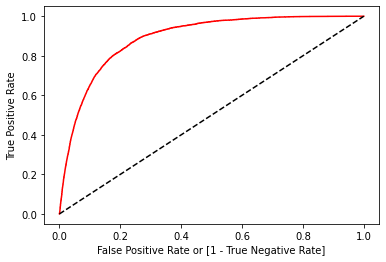

In [53]:
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score

fpr, tpr, thresholds = roc_curve(y, classifier.predict_proba(x)[:,1])

auc = roc_auc_score(y_test, y_pred)

import matplotlib.pyplot as plt
plt.plot(fpr, tpr, color='red')
plt.plot([0, 1], [0, 1], 'k--')
#plt.plot(thresholds)

plt.xlabel('False Positive Rate or [1 - True Negative Rate]')
plt.ylabel('True Positive Rate')

In [49]:
auc

0.8097347623431936

The auc score is 0.80 its good classifier

In [424]:
thresholds

array([2.00000000e+00, 1.00000000e+00, 9.99999999e-01, ...,
       2.07293165e-02, 2.07283183e-02, 9.07207526e-05])

In [425]:
fpr

array([0.00000000e+00, 2.50488452e-05, 5.00976905e-05, ...,
       9.42938731e-01, 9.42938731e-01, 1.00000000e+00])

In [426]:
tpr

array([0.        , 0.        , 0.        , ..., 0.99981093, 1.        ,
       1.        ])